In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F180%2F408%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240708%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240708T021756Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D253ddecb65d4130a7135e0d67361b3d7cc5bfedfb13eb7a38f6d3f3b631e9cdb409c867ce4f72f9aeeb7e27755e12a2fff67b8babfda961c7aa50c0605ae46b4e87fe0654c5a47216908927e775dbc6cf3722f69d27198072cda61c37aac59cafe45321547b73d9c0e60a51717b4a1b297feee70988a90eddc1766c0ff74d065e2e0a7b575c4927133100478a8eb6796b02e3e86492904d639aa5f38b0b1b4b22f10bd095a8e1ae7687ddd3ed288cd8feac85e899df033196a1440f60fcf985f507f889cb27d3083815954966cbd423fab9dc7e870f95244efad341fcd42b18152d26d82255997df5691690a65139040bb6022c40c5297b196cff40b2a4a49fa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Breast Cancer EDA

## Dataset: [Breast Cancer Wisconsin Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

### In this tutorial, we will learn how to select the best parameters for our models. We will learn how to use GridSearchCV from the sklearn.model_selection package to tune all the parameters.

### Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

### It can be as simple as the following:
* How many trees should I include in my random forest?
* What degree of polynomial features should I use for my linear model?
* What should be the maximum depth allowed for my decision tree?
* How many layers should I have in my neural network?
* What should I set my learning rate to for gradient descent?

### Import all the necessary header files as follows:
* pandas : An open source library used for data manipulation, cleaning, analysis and visualization.
* numpy : A library used to manipulate multi-dimensional data in the form of numpy arrays with useful in-built functions.
* matplotlib : A library used for plotting and visualization of data.
* seaborn : A library based on matplotlib which is used for plotting of data.
* sklearn.metrics : A library used to calculate the accuracy, precision and recall.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
# Importing the dataset
data = pd.read_csv("/home/jovyan/shared/Learning materials/subsections/4.*/code/data/data.csv")

### Inspecting and cleaning the data

In [5]:
# Printing the 1st 5 columns
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Printing the dimensions of data
data.shape

(569, 33)

In [7]:
# Viewing the column heading
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# Inspecting the target variable
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Identifying the unique number of values in the dataset
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Dropping the Unnamed: 32 and the id column since these do not provide any useful information for our models.

In [12]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [13]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [14]:
# Viewing the data statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Visualization

In [15]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

ValueError: could not convert string to float: 'M'

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

NameError: name 'corr' is not defined

<Figure size 2000x2000 with 0 Axes>

The above heatmap shows us a correlation between the various features. The closer the value to 1, the higher is the correlation between the pair of features.

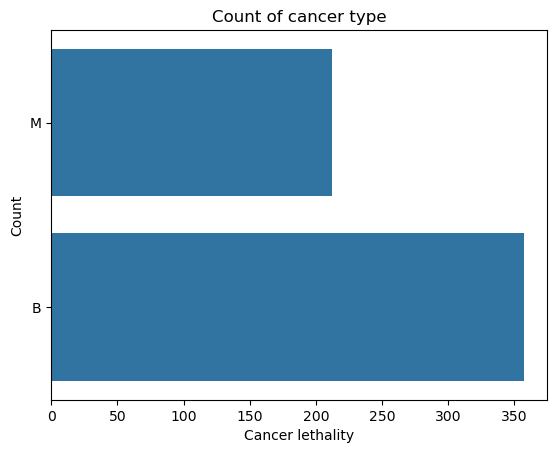

In [17]:
# Analyzing the target variable

plt.title('Count of cancer type')
sns.countplot(data['diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

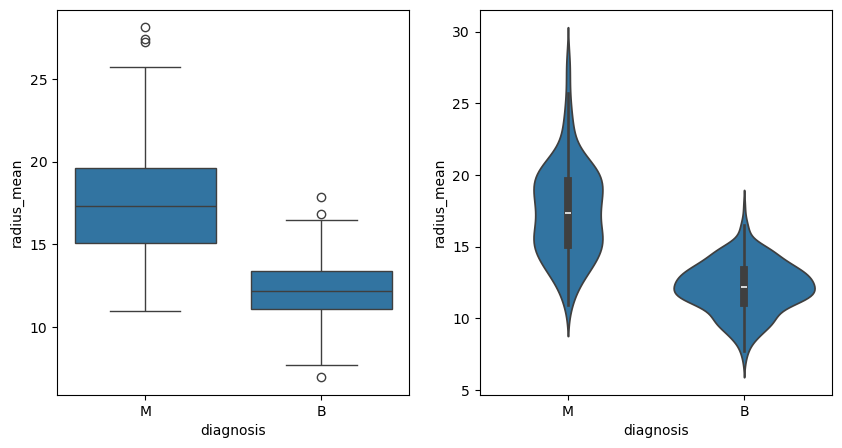

In [18]:
# Plotting correlation between diagnosis and radius

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=data)
plt.show()

Boxplot shows us the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It is useful for detecting the outliers. <br>
Violin plot shows us the kernel density estimate on each side.

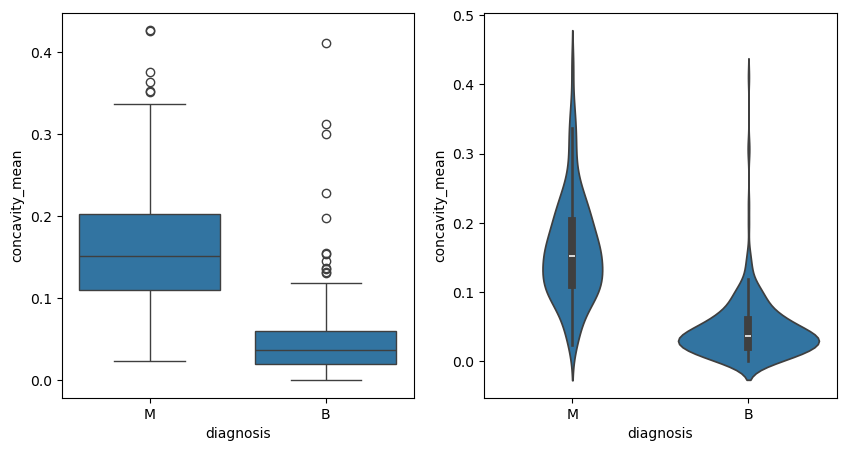

In [19]:
# Plotting correlation between diagnosis and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=data)
plt.show()

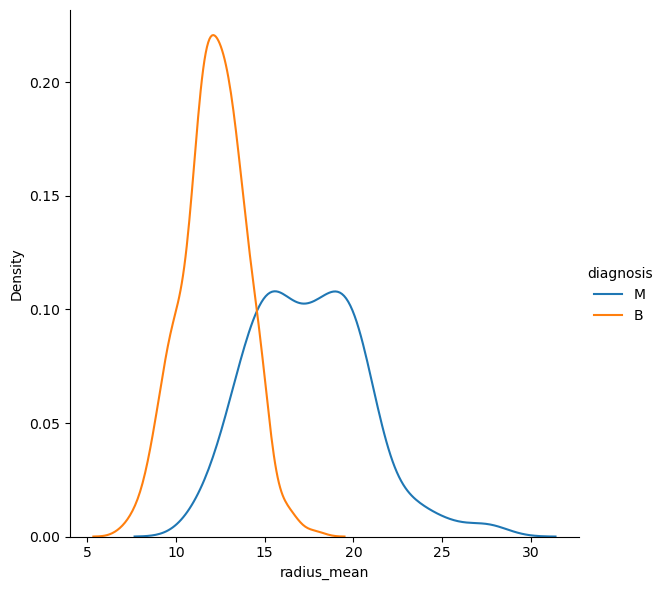

In [20]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

/tmp/ipykernel_400/1706326689.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="diagnosis", y="radius_mean", data=data, jitter=True, edgecolor="gray")


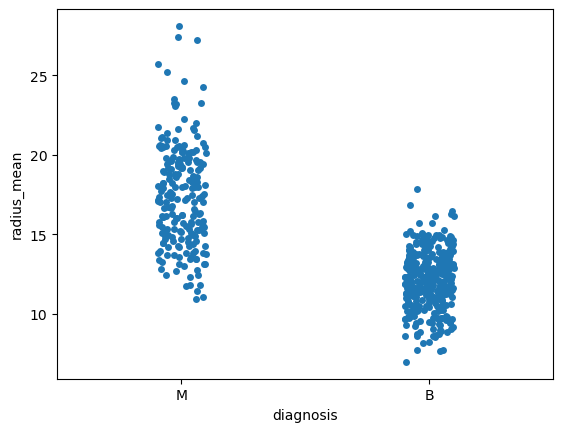

In [21]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=data, jitter=True, edgecolor="gray")
plt.show()

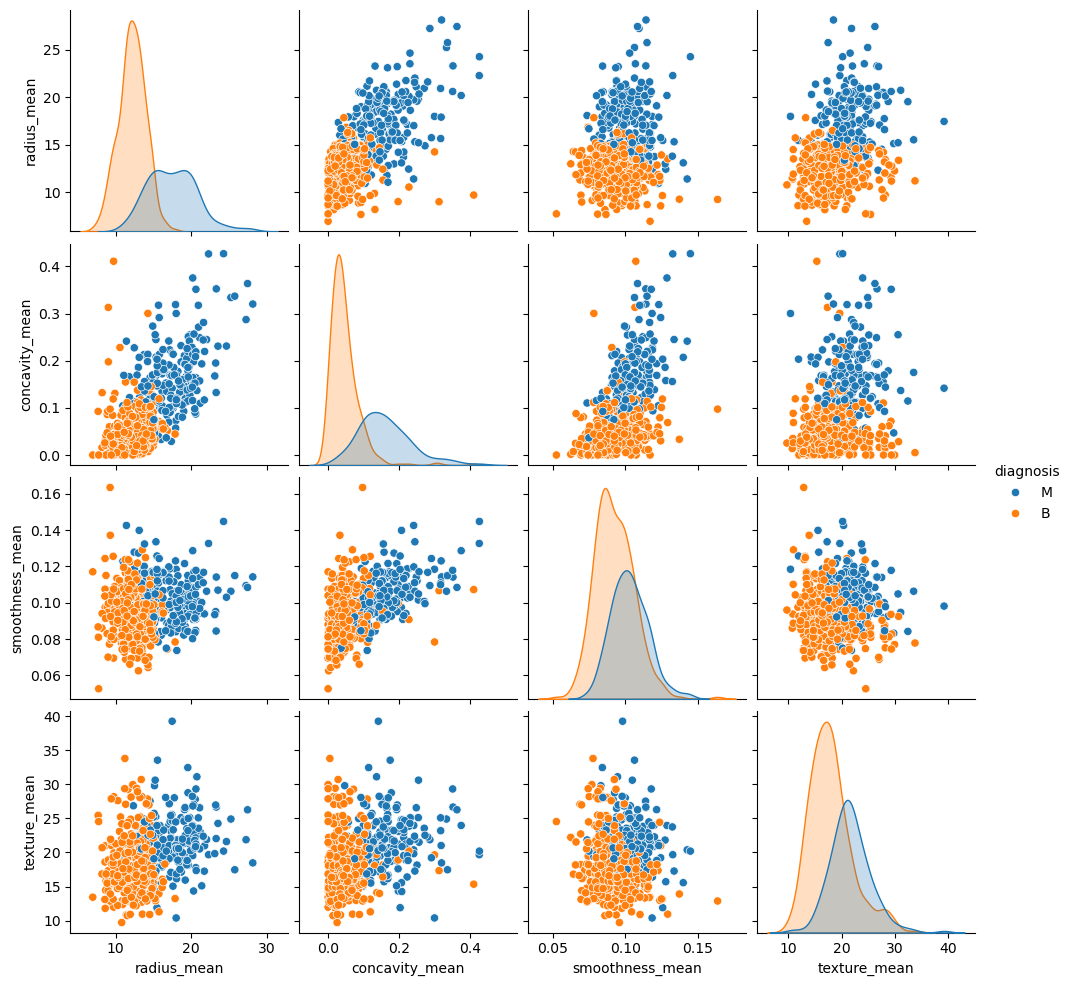

In [22]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"
sns.pairplot(data, hue="diagnosis", vars = ["radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"])
plt.show()

### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [23]:
# Spliting target variable and independent variables
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

In [24]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (398, 30)
Size of test set: (171, 30)


## Logistic Regression

In [25]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [27]:
# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  95.91


## Gaussian Naive Bayes

In [28]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB()

In [29]:
# Prediction on test set
y_pred = model.predict(X_test)

In [30]:
# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  92.4


## Decision Tree

In [31]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

## Hyperparameter Optimization

Steps to tune the parameters:
1. Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
2. Set various values to these parameters and store them in a dictionary as shown below.
3. Create an object of the GridSearchCV class and assign the parameters to it.
4. Fit the training set in the object.
5. We will get the best parameters from the best_estimator_ property of the object.
6. Use this object to fit training set to your classifier.

In [32]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.11/site-packages/sklearn/uti

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8)

In [33]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [34]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  91.23


## Random Forest

Follow the above mentioned steps to tune the parameters.

In [35]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets
rf.fit(X_train,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.11/site-packages/sklearn/u

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=9)

In [36]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [37]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  94.15


## Support Vector Machine

In [38]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [40]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [41]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  98.25


## K - Nearest Neighbors

In [42]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [43]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [44]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  95.91


## Evaluation and comparision of all the models

In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines',
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,98.25
0,Logistic Regression,95.91
5,K - Nearest Neighbors,95.91
3,Random Forest,94.15
1,Naive Bayes,92.40
2,Decision Tree,91.23


## We can see from the above table that SVM classifier works best for this dataset.
### Before hyperparameter tuning, I was getting an accuracy of mere 92.40 for SVM model but after parameter tuning, we obtained an accuracy of 98.25. Hence parameter tuning is important to get a very high accuracy.  

#### Here is blog that is quite informative and might be useful to learn more about Hyperparameter Tuning: https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020

Please upvote if you found this kernel useful! :) <br>
Feedbacks appreciated.